In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# Create the directory if it doesn't exist
plot_dir = "../../plots/p1_data_extraction"
os.makedirs(plot_dir, exist_ok=True)

In [3]:
# Load data from CSV files
material_data = pd.read_csv('../../data/d1_data_extraction/material_data.csv')
c2db_data = pd.read_csv('../../data/d1_data_extraction/c2db.csv')
matpedia_data = pd.read_csv('../../data/d1_data_extraction/2Dmatpedia.csv')
c1db_data = pd.read_csv('../../data/d1_data_extraction/c1db.csv')
mc3d_data = pd.read_csv('../../data/d1_data_extraction/mc3d.csv')

C:\Users\aaayu\AppData\Local\Temp\ipykernel_3444\2708939639.py:3: DtypeWarning: Columns (149) have mixed types. Specify dtype option on import or set low_memory=False.
  c2db_data = pd.read_csv('../../data/d1_data_extraction/c2db.csv')


In [4]:
# Removing duplicates

# The Materials Project

print("Shape Before Remvoing Duplicates: ", material_data.shape)
# Removing Duplicates
material_data_unique = material_data.drop_duplicates(subset='Formula', keep='first')
# Checking Shape after removing
print("Shape After removing Duplicates: ", material_data_unique.shape)

# C2DB

print("Shape Before Remvoing Duplicates: ", c2db_data.shape)
# Removing Duplicates
c2db_data_unique = c2db_data.drop_duplicates(subset='Formula', keep='first')
# Checking Shape after removing
print("Shape After removing Duplicates: ", c2db_data_unique.shape)

# 2DMatpedia

print("Shape Before Remvoing Duplicates: ", matpedia_data.shape)
# Removing Duplicates
matpedia_data_unique = matpedia_data.drop_duplicates(subset='Formula', keep='first')
# Checking Shape after removing
print("Shape After removing Duplicates: ", matpedia_data_unique.shape)

# C1DB

print("Shape Before Remvoing Duplicates: ", c1db_data.shape)
# Removing Duplicates
c1db_data_unique = c1db_data.drop_duplicates(subset='Formula', keep='first')
# Checking Shape after removing
print("Shape After removing Duplicates: ", c1db_data_unique.shape)

# MC3D

print("Shape Before Remvoing Duplicates: ", mc3d_data.shape)
# Removing Duplicates
mc3d_data_unique = mc3d_data.drop_duplicates(subset='formula', keep='first')
# Checking Shape after removing
print("Shape After removing Duplicates: ", mc3d_data_unique.shape)

Shape Before Remvoing Duplicates:  (153235, 10)
Shape After removing Duplicates:  (104039, 10)
Shape Before Remvoing Duplicates:  (15733, 168)
Shape After removing Duplicates:  (13435, 168)
Shape Before Remvoing Duplicates:  (6349, 10)
Shape After removing Duplicates:  (4378, 10)
Shape Before Remvoing Duplicates:  (3152, 59)
Shape After removing Duplicates:  (2111, 59)
Shape Before Remvoing Duplicates:  (34487, 4)
Shape After removing Duplicates:  (31464, 4)


In [5]:
# Get the counts of chemical formulas before removing duplicates
counts_before = [
    len(material_data),
    len(c2db_data),
    len(matpedia_data),
    len(c1db_data),
    len(mc3d_data)
]

# Get the counts of chemical formulas after removing duplicates
counts_after = [
    len(material_data_unique),
    len(c2db_data_unique),
    len(matpedia_data_unique),
    len(c1db_data_unique),
    len(mc3d_data_unique)
]


databases_before = [
    f'The Materials Project ({counts_before[0]})',
    f'C2DB ({counts_before[1]})',
    f'2DMatpedia ({counts_before[2]})',
    f'C1DB ({counts_before[3]})',
    f'MC3D ({counts_before[4]})'
]

databases_after = [
    f'The Materials Project ({counts_after[0]})',
    f'C2DB ({counts_after[1]})',
    f'2DMatpedia ({counts_after[2]})',
    f'C1DB ({counts_after[3]})',
    f'MC3D ({counts_after[4]})'
]

In [6]:
# Side-by-side Horizontal Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.barplot(x=counts_before, y=databases_before, palette="viridis", ax=ax[0])
ax[0].set_xlabel('Number of Chemical Formulas')
ax[0].set_ylabel('Databases')
ax[0].set_title('Before Removing Duplicates')

sns.barplot(x=counts_after, y=databases_after, palette="viridis", ax=ax[1])
ax[1].set_xlabel('Number of Chemical Formulas')
ax[1].set_ylabel('Databases')
ax[1].set_title('After Removing Duplicates')

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'horizontal_bar_plot_comparison.png'))
plt.close()

C:\Users\aaayu\AppData\Local\Temp\ipykernel_3444\2089594998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_before, y=databases_before, palette="viridis", ax=ax[0])
C:\Users\aaayu\AppData\Local\Temp\ipykernel_3444\2089594998.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_after, y=databases_after, palette="viridis", ax=ax[1])


ValueError: too many values to unpack (expected 3)

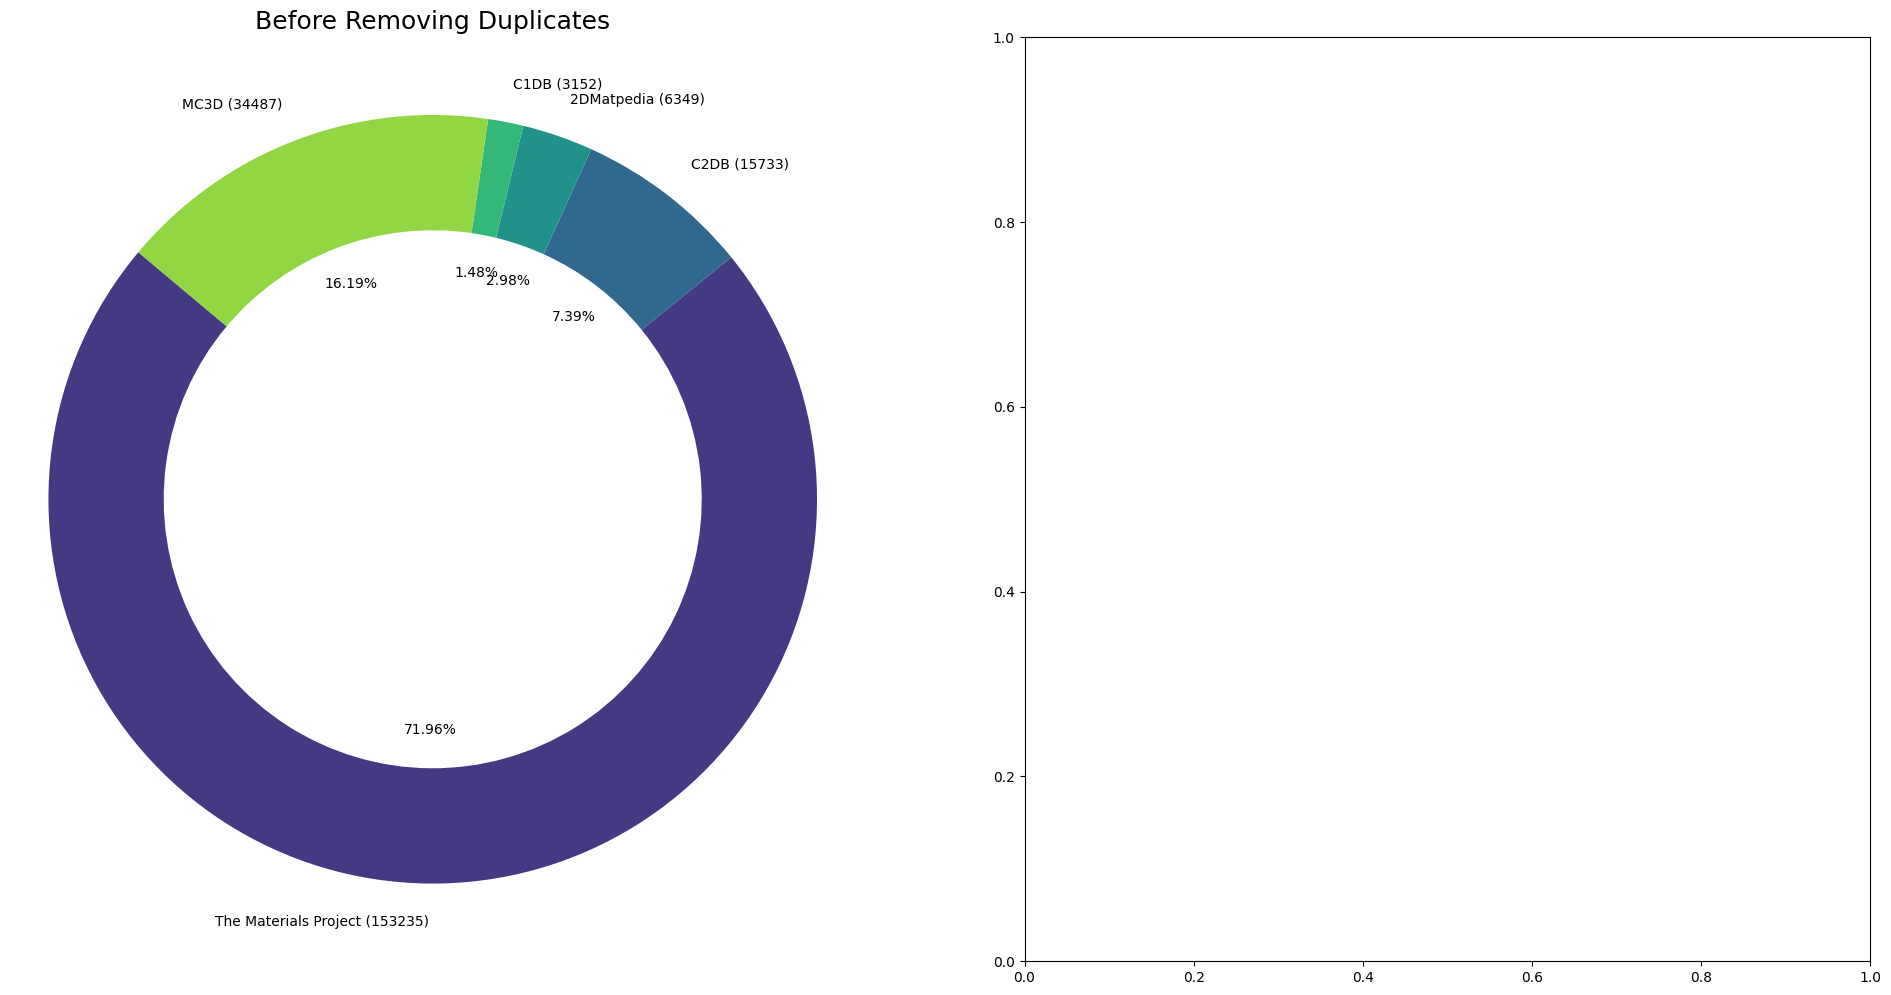

In [17]:
# Side-by-side Donut Chart
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

# Function to increase text size
def set_pie_labels(pie, labels, autopct):
    wedges, texts, autotexts = pie
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_fontsize(14)
    pie_labels = [f'{label}\n{percent:.2f}%' for label, percent in zip(labels, autopct)]
    return pie_labels

# Plot before removing duplicates
pie_before = ax[0].pie(counts_before, labels=databases_before, autopct='%1.2f%%', startangle=140, colors=sns.color_palette("viridis", len(databases_before)), wedgeprops=dict(width=0.3))
ax[0].set_title('Before Removing Duplicates', fontsize=18)
ax[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
set_pie_labels(pie_before, databases_before, [percent for _, _, percent in pie_before])

# Plot after removing duplicates
pie_after = ax[1].pie(counts_after, labels=databases_after, autopct='%1.2f%%', startangle=140, colors=sns.color_palette("viridis", len(databases_after)), wedgeprops=dict(width=0.3))
ax[1].set_title('After Removing Duplicates', fontsize=18)
ax[1].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
set_pie_labels(pie_after, databases_after, [percent for _, _, percent in pie_after])

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'formula_count_1.png'), dpi=300)  # Increase dpi for better resolution
plt.close()

In [18]:
# Side-by-side Donut Chart with increased plot size and larger text
fig, ax = plt.subplots(1, 2, figsize=(24, 12))  # Increase the figsize here

# Function to set larger font size for text elements
def set_pie_labels(ax, pie_elements):
    for text in pie_elements[1]:  # texts (label)
        text.set_fontsize(14)
    for autotext in pie_elements[2]:  # autotexts (percentages)
        autotext.set_fontsize(14)

# Plot before removing duplicates
pie_before = ax[0].pie(counts_before, labels=databases_before, autopct='%1.2f%%', startangle=140, colors=sns.color_palette("viridis", len(databases_before)), wedgeprops=dict(width=0.3))
ax[0].set_title('Before Removing Duplicates', fontsize=18)
ax[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
set_pie_labels(ax[0], pie_before)

# Plot after removing duplicates
pie_after = ax[1].pie(counts_after, labels=databases_after, autopct='%1.2f%%', startangle=140, colors=sns.color_palette("viridis", len(databases_after)), wedgeprops=dict(width=0.3))
ax[1].set_title('After Removing Duplicates', fontsize=18)
ax[1].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
set_pie_labels(ax[1], pie_after)

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'formula_count.png'), dpi=300)  # Increase dpi for better resolution
plt.close()